In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [6]:
cities_path = os.path.join("..","Resources","cities_housing_new.csv")
# national_path = os.path.join("..","Resources","national_housing.csv")
# states_path = os.path.join("..","Resources","tx_housing.csv")

In [8]:
housing_df = pd.read_csv(cities_path)
# national_housing_df = pd.read_csv(national_path)
# states_housing_df = pd.read_csv(states_path)

In [9]:
# housing_df = cities_housing_df.append([national_housing_df, states_housing_df])
# housing_df = cities_housing_df.append(national_housing_df)
housing_df.head()

,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,...,Inventory Yoy,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,New Listings,New Listings Mom,New Listings Yoy
0,"Sugar Land, TX",February 2012,All Residential,Place/City,False,TX,0.952058,-0.5%,0.6%,113,...,-27.9%,88,9.0,10.0,$220K,-0.7%,-5.0%,183,27.1%,-9.0%
1,"Missouri City, TX",February 2012,All Residential,Place/City,False,TX,0.966081,1.6%,1.7%,88,...,-27.8%,105,-2.0,17.0,$185K,7.5%,9.4%,154,13.2%,13.2%
2,"Galveston, TX",May 2012,All Residential,Place/City,False,TX,0.936675,-1.1%,-6.3%,97,...,19.3%,77,15.0,42.0,$139K,-6.1%,-9.8%,130,-11.0%,62.5%
3,"Texas City, TX",May 2012,All Residential,Place/City,False,TX,0.949948,2.0%,-6.3%,30,...,21.8%,61,-9.0,56.0,$84K,23.0%,222.4%,43,-27.1%,34.4%
4,"Baytown, TX",July 2012,All Residential,Place/City,False,TX,0.981432,1.4%,0.8%,84,...,-15.0%,69,12.0,5.0,$120K,0.2%,9.0%,110,-22.0%,20.9%


In [10]:
# DELETE  output = os.path.join("..","Resources","housing_data_merged.csv")
# housing_df.to_csv(output)


housing_df["Median Sale Price"] = housing_df["Median Sale Price"].str.lower().replace('k','',regex=True)
housing_df["Median Sale Price"] = housing_df["Median Sale Price"].str.replace('$','',regex=True)
housing_df["Median Sale Price"] = housing_df["Median Sale Price"].astype(float)
housing_df["Median Sale Price"] = housing_df["Median Sale Price"] * 1000
housing_df


,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,...,Inventory Yoy,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,New Listings,New Listings Mom,New Listings Yoy
0,"Sugar Land, TX",February 2012,All Residential,Place/City,False,TX,0.952058,-0.5%,0.6%,113,...,-27.9%,88,9.0,10.0,220000.0,-0.7%,-5.0%,183,27.1%,-9.0%
1,"Missouri City, TX",February 2012,All Residential,Place/City,False,TX,0.966081,1.6%,1.7%,88,...,-27.8%,105,-2.0,17.0,185000.0,7.5%,9.4%,154,13.2%,13.2%
2,"Galveston, TX",May 2012,All Residential,Place/City,False,TX,0.936675,-1.1%,-6.3%,97,...,19.3%,77,15.0,42.0,139000.0,-6.1%,-9.8%,130,-11.0%,62.5%
3,"Texas City, TX",May 2012,All Residential,Place/City,False,TX,0.949948,2.0%,-6.3%,30,...,21.8%,61,-9.0,56.0,84000.0,23.0%,222.4%,43,-27.1%,34.4%
4,"Baytown, TX",July 2012,All Residential,Place/City,False,TX,0.981432,1.4%,0.8%,84,...,-15.0%,69,12.0,5.0,120000.0,0.2%,9.0%,110,-22.0%,20.9%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,"League City, TX",March 2018,All Residential,Place/City,False,TX,0.986064,1.1%,0.2%,171,...,-13.0%,31,-28.0,-6.0,275000.0,3.1%,7.8%,206,30.4%,-10.4%
1036,"Pasadena, TX",November 2018,All Residential,Place/City,False,TX,0.968382,-0.1%,-0.2%,61,...,42.3%,19,1.0,-13.0,174000.0,12.7%,2.4%,85,-14.1%,11.8%
1037,"Galveston, TX",April 2019,All Residential,Place/City,False,TX,0.958958,-0.9%,-0.1%,142,...,2.1%,44,-24.0,3.0,250000.0,-7.4%,4.4%,201,-12.6%,-2.4%
1038,"Missouri City, TX",February 2020,All Residential,Place/City,False,TX,0.973769,0.5%,0.7%,139,...,-9.9%,67,12.0,-5.0,250000.0,6.7%,8.5%,224,43.6%,36.6%


In [11]:
housing_df.describe()

,Avg Sale To List,Homes Sold,Inventory,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,New Listings
count,1040.000000,1040.000000,1040.000000,1040.000000,1038.000000,1030.000000,1040.000000,1040.000000
mean,0.970292,343.250962,1170.173077,43.485577,-0.531792,-6.188350,198752.884615,449.114423
std,0.013281,740.950538,2549.680581,23.495946,16.260074,34.495383,61869.429179,986.661033
min,0.889938,12.000000,41.000000,7.000000,-71.000000,-661.000000,55000.000000,21.000000
25%,0.964961,62.000000,190.000000,26.000000,-8.000000,-15.000000,157000.000000,78.000000
50%,0.972526,99.000000,345.500000,38.500000,0.000000,-2.000000,190000.000000,124.000000
75%,0.979261,159.000000,565.500000,56.000000,7.000000,7.000000,240250.000000,194.250000
max,1.006847,3609.000000,11298.000000,141.000000,71.000000,99.000000,389000.000000,4597.000000


In [12]:
housing_df["Month of Period End"] = pd.to_datetime(housing_df["Month of Period End"],format='%B %Y')

# grouped__housing_df = housing_df.groupby("Region")
# housing_df = housing_df.sort_values(by="Month of Period End")

grouped_housing = housing_df.groupby([housing_df["Region"], housing_df["Month of Period End"].dt.year])

# grouped_housing = housing_df["Month of Period End"].dt.year]).median()
                                     
grouped_housing_df = grouped_housing.agg(MedianSalePrice=pd.NamedAgg(column='Median Sale Price', aggfunc='mean'))


# grouped_housing = grouped_housing.reset_index(inplace = True)
grouped_housing_df.head(25)


MedianSalePrice
Region          Month of Period End                 
Baytown, TX     2012                   116000.000000
                2013                   123000.000000
                2014                   138333.333333
                2015                   151833.333333
                2016                   167083.333333
                2017                   175833.333333
                2018                   187250.000000
                2019                   195500.000000
                2020                   206000.000000
Friendswood, TX 2012                   184916.666667
                2013                   195166.666667
                2014                   214250.000000
                2015                   214833.333333
                2016                   263500.000000
                2017                   265000.000000
                2018                   257083.333333
                2019                   281083.333333
                2020                   295750.000000
Galveston, TX   2012                   152083.333333
                2013                   170000.000000
                2014                   178333.333333
                2015                   172166.666667
                2016                   194416.666667
                2017                   208166.666667
                2018                   222833.333333

In [22]:
grouped_housing_df.unstack(level=0).columns

MultiIndex([('MedianSalePrice',       'Baytown, TX'),
            ('MedianSalePrice',   'Friendswood, TX'),
            ('MedianSalePrice',     'Galveston, TX'),
            ('MedianSalePrice',       'Houston, TX'),
            ('MedianSalePrice',      'La Porte, TX'),
            ('MedianSalePrice',   'League City, TX'),
            ('MedianSalePrice', 'Missouri City, TX'),
            ('MedianSalePrice',      'Pasadena, TX'),
            ('MedianSalePrice',    'Sugar Land, TX'),
            ('MedianSalePrice',    'Texas City, TX')],
           names=[None, 'Region'])

In [26]:
y_axis = grouped_housing_df["MedianSalePrice"].unique()

Text(0.5, 1.0, 'Median Sale Price per City')

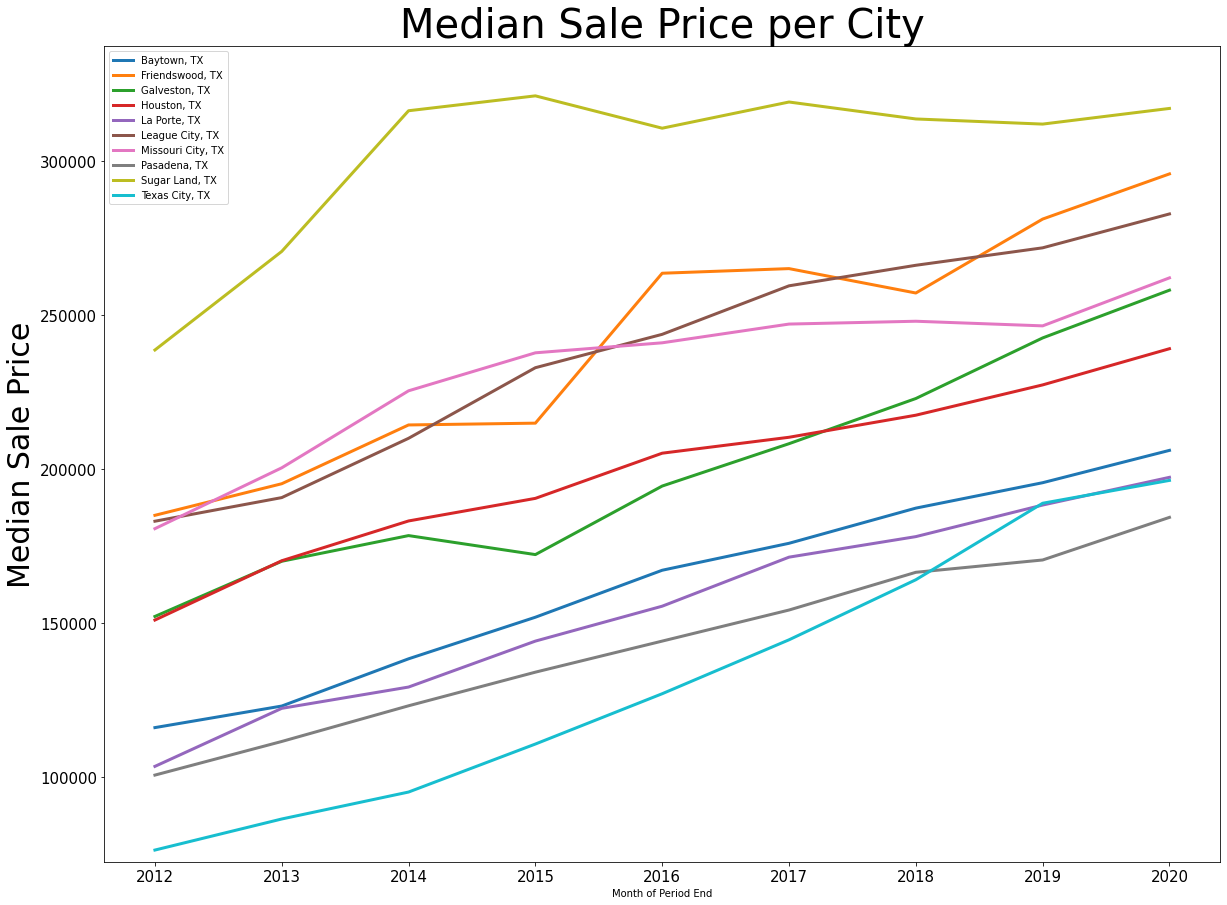

In [31]:
unstacked_housing = grouped_housing_df.unstack(level=0)


unstacked_housing.plot.line(legend=False, figsize = (20,15), alpha = 1, linewidth = 3)
plt.legend(labels = [x[1] for x in unstacked_housing.columns.tolist()], loc="best")
plt.ylabel("Median Sale Price", fontsize = 30)
plt.ylim(y_axis.min()*.95,y_axis.max()*1.05)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title("Median Sale Price per City", fontsize = 40)


## Median Housing Price per City (line  graph)

In [97]:
# Create list for axis in line graph
city_list = housing_df["Region"].unique()
y_axis = housing_df["Median Sale Price"].unique()
city_list


array(['Texas City, TX', ' National', 'Missouri City, TX',
       'Sugar Land, TX', 'Conroe, TX', 'League City, TX', 'Galveston, TX',
       'Baytown, TX', 'Texas', 'Houston, TX', 'Pasadena, TX',
       'Friendswood, TX'], dtype=object)

KeyError: False

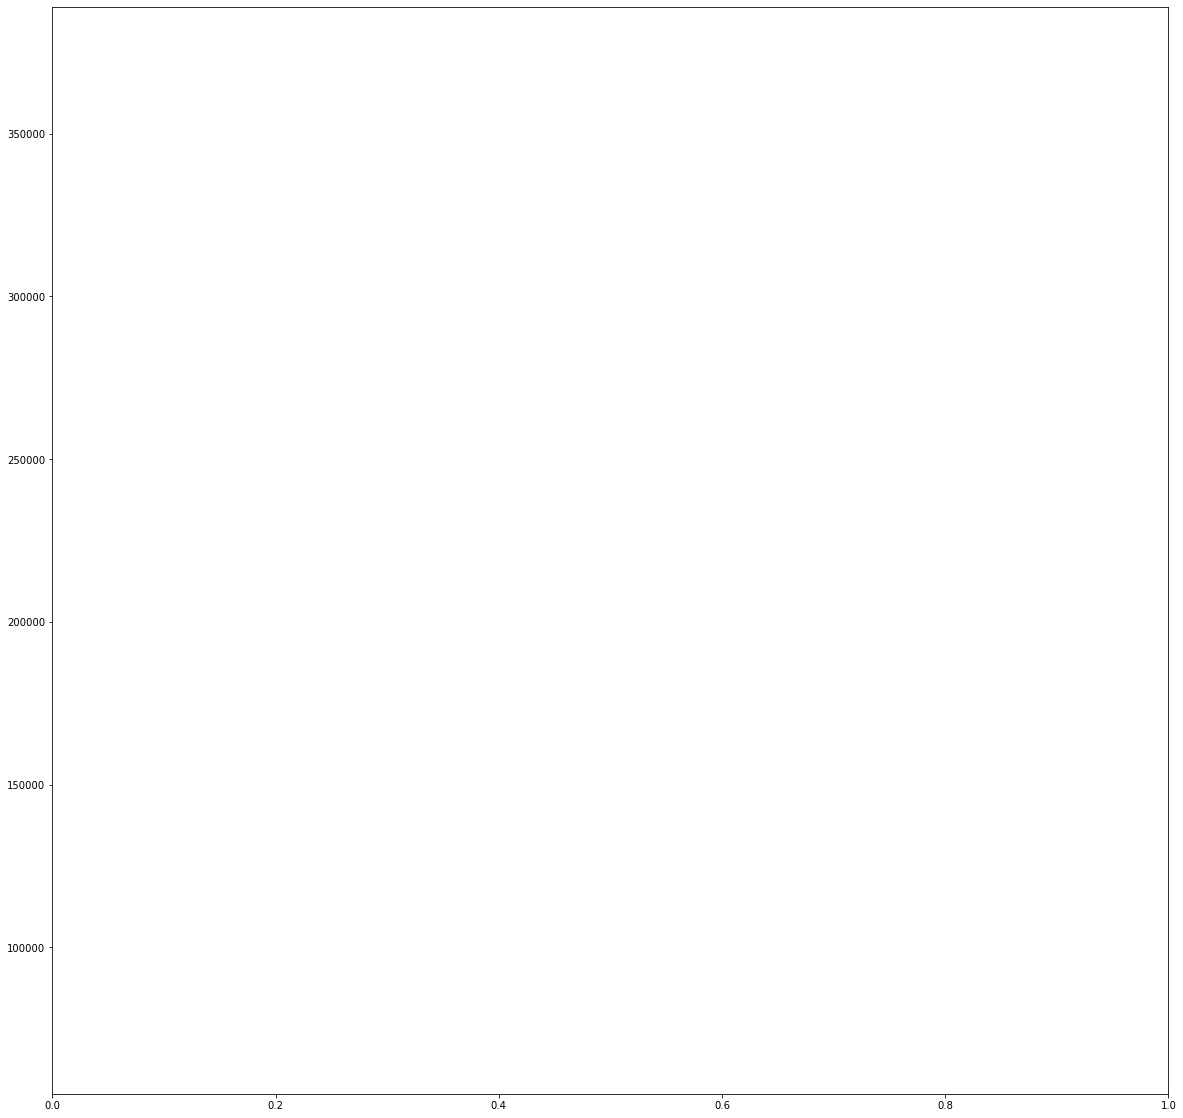

In [108]:
#DELETE - ONLY KEEP NOW TO REFERENCE CHARTING LAYOUT OPTIONS
# for city in city_list:
#     to_graph = grouped_housing_df.loc[grouped_housing_df.index[0] == city]
#     plt.plot(to_graph.index[1],to_graph["MedianSalePrice"], label=city, alpha = .6, linewidth = 1, color= "grey")
#     plt.legend(loc="best")
    
# houston = housing_df.loc[housing_df["Region"] == "Houston, TX"]
# plt.plot(houston["Month of Period End"],houston["Median Sale Price"], color="orange", alpha = 1, linewidth= 2, label="Houston, TX")

# plt.plot(grouped_housing_df.index,grouped_housing_df["MedianSalePrice"], label=city, alpha = .6, linewidth = 1, color= "grey")
# plt.legend(loc="best")
    

In [27]:
# grouped_housing_df = housing_df.groupby('Region')

#DELETE - ONLY KEEP NOW TO REFERENCE CHARTING LAYOUT OPTIONS

# houston = housing_df.loc[housing_df["Region"] == "Houston, TX"]
# plt.figure(figsize = (10,5))
# plt.plot(houston["Month of Period End"],houston["Median Sale Price"], label="Houston")
# plt.ylim(min(housing_df["Median Sale Price"])*.95, max(housing_df["Median Sale Price"])*1.05)
# plt.xticks(rotation=90)
# plt.ylabel("Median Sale Price")
# plt.title("Median Sale Price per Area")
# plt.legend(loc="best")
# plt.tight_layout()


SyntaxError: invalid syntax (<ipython-input-27-c89fb8d637e5>, line 6)

## Inventory Changes - YoY

## New Listings

## Merging FBI data per county or city